![](2022-11-19-18-23-36.png)

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("store_sharing.csv", parse_dates = ['timestamp'], index_col = "timestamp")
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

In [7]:
df.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


In [9]:
def boxplotit(data,x = 3, y = 3, drops=[] , whisker = 1.5):
    index = 0
    plt.figure(figsize=(x*6, y*4))
    for feature in df.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x , y , index)
        sns.boxplot(x = feature, data = df, whis = whisker)

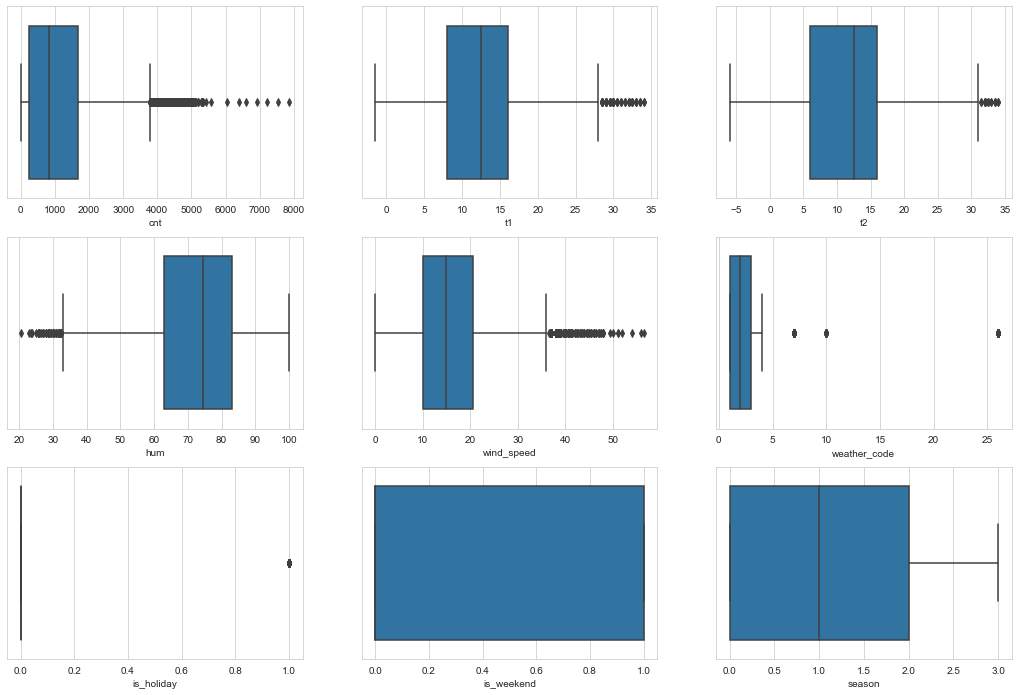

In [11]:
boxplotit(df);

### Plot Breakdowns of Data

In [ ]:
# df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
# df.set_index("timestamp", drop = True, inplace = True)

In [19]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['dayOfWeek'] = df.index.dayofweek
df['date'] = df.index.date

In [21]:
# df["year"] = df["timestamp"].apply(lambda x : x.year)
# df["month"] = df["timestamp"].apply(lambda x : x.month)
# df["day"] = df["timestamp"].apply(lambda x : x.day)
# df["dayofweek"] = df["timestamp"].apply(lambda x : x.weekday())
# df["hour"] = df["timestamp"].apply(lambda x : x.hour)
# df["date"] = df["timestamp"].apply(lambda x : x.date())

In [22]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayOfWeek,date
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,0,6,2015-01-04
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,1,6,2015-01-04
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,2,6,2015-01-04
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,3,6,2015-01-04
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,4,6,2015-01-04


In [ ]:
# df ["season_name"] = df.index.month.map(lambda x: "spring" if x in [3,4,5] else "summer" if x in [6,7,8] else "fall" if x in [9,10,11] else "winter")  # If we get from months.

In [23]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"}) # But this is easier now because we have season feature already.

In [24]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayOfWeek,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,0,6,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,1,6,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,2,6,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,3,6,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,4,6,2015-01-04,Winter


***i. Plot bike shares over time***

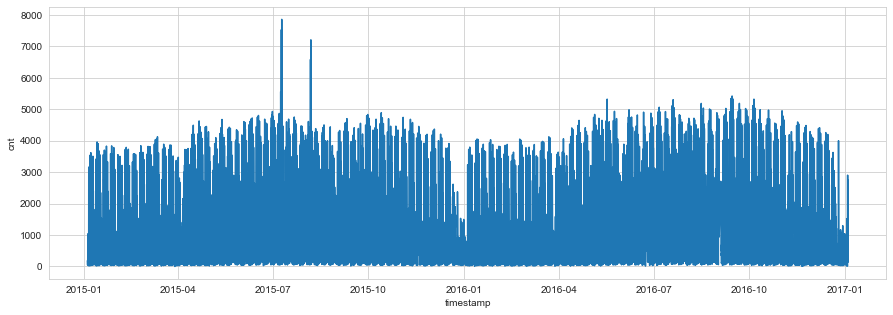

In [26]:
plt.figure(figsize = (15,5))

sns.lineplot(x = df.index , y = df.cnt); # Hour by hour cnt.

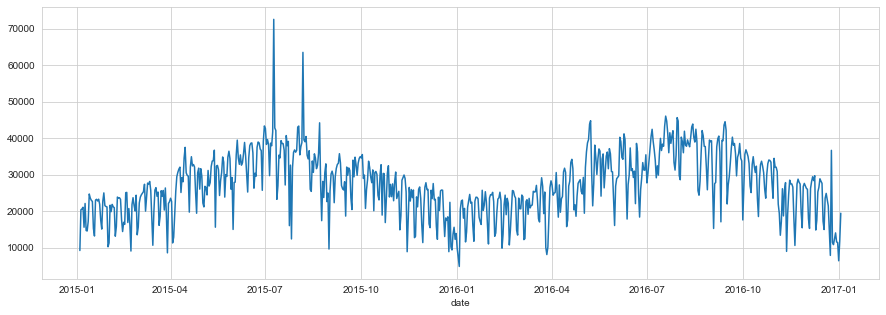

In [32]:
plt.figure(figsize = (15,5))

day_by_day = df.groupby('date')['cnt'].sum()

sns.lineplot(x = day_by_day.index , y = day_by_day.values);

***ii. Plot bike shares by months***

In [44]:
df.resample('M').sum()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayOfWeek
timestamp,,,,,,,,,,,,,,
2015-01-31,546639,4101.000,2255.500,51005.000,12502.000,2211.000,0.000,192.000,2013.000,1352065,671,11753,7709,2014
2015-02-28,543594,3721.500,1868.000,51950.000,9873.500,2409.000,0.000,192.000,2013.000,1352065,1342,9734,7707,2015
2015-03-31,695934,6093.500,4558.500,51832.250,12938.250,1940.000,0.000,215.000,0.000,1489085,2217,11751,8540,2174
2015-04-30,831582,7873.000,7112.500,48468.000,10988.500,1642.000,48.000,191.000,0.000,1448785,2876,11156,8270,2131
2015-05-31,895413,10091.500,9803.500,47939.000,14268.500,1900.000,48.000,240.000,0.000,1499160,3720,11904,8556,2376
2015-06-30,1033252,12151.500,12073.000,44371.500,12398.000,1457.000,0.000,192.000,717.000,1444755,4302,11145,8268,2028
2015-07-31,1120687,14107.000,14060.000,46632.500,13067.000,1710.000,0.000,192.000,740.000,1491100,5180,11831,8508,2232
2015-08-31,1033951,13830.500,13816.500,51913.500,10326.000,1948.000,24.000,240.000,744.000,1499160,5952,11904,8556,2280
2015-09-30,892478,10371.000,10357.500,52002.000,9394.000,1683.000,0.000,185.000,1422.000,1432665,6399,11047,8210,2045


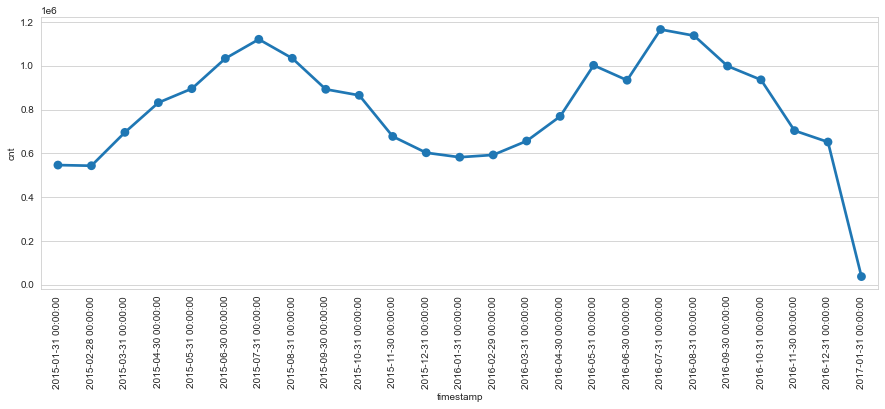

In [45]:
data_by_month = df.resample('M').sum() # .resample is more ideal for time series but you can also almost same thing with .groupby()

plt.figure(figsize = (15,5))

plt.xticks(rotation = 90)

sns.pointplot(x = data_by_month.index, y = data_by_month.cnt);

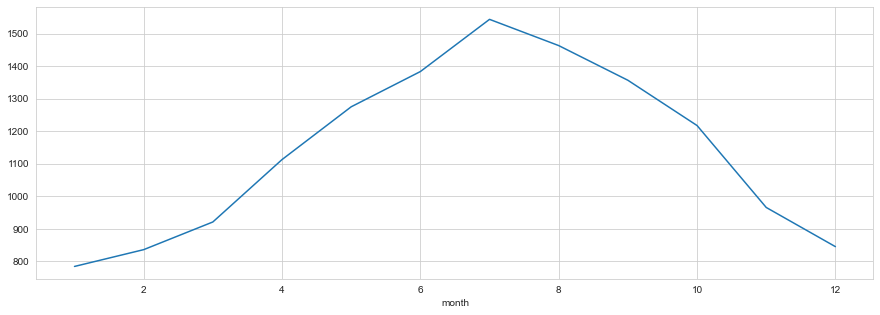

In [48]:
month_cnt = df.groupby("month")["cnt"].mean()

plt.figure(figsize = (15,5))

sns.lineplot( x = month_cnt.index, y = month_cnt.values);

In [50]:
# df.groupby(["year", "month"])["cnt"].mean()

year  month
2015  1        814.663
      2        810.125
      3        941.724
      4       1156.581
      5       1203.512
      6       1441.077
      7       1514.442
      8       1389.719
      9       1255.243
      10      1175.334
      11       952.647
      12       814.646
2016  1        782.954
      2        861.788
      3        900.586
      4       1069.325
      5       1346.687
      6       1324.650
      7       1572.911
      8       1536.911
      9       1462.107
      10      1259.362
      11       978.942
      12       876.220
2017  1        523.333
Name: cnt, dtype: float64

In [51]:
# df.groupby(["year", "month"])["cnt"].mean().index.levels[0]

Int64Index([2015, 2016, 2017], dtype='int64', name='year')

In [58]:
# df.groupby(["year", "month"])["cnt"].mean()[2015].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

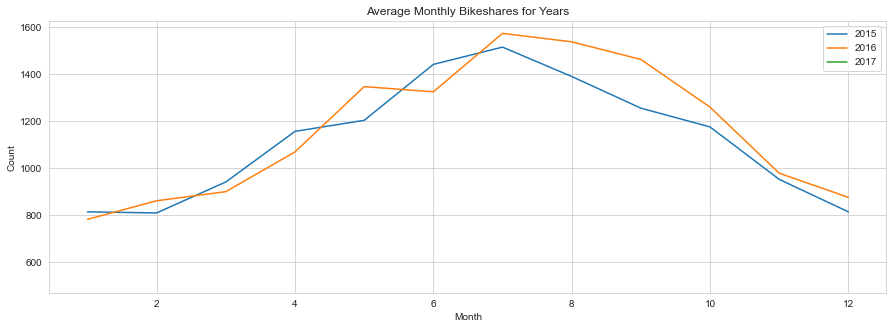

In [49]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize = (15,5))

for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')

plt.show() # It's cool visulization.

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

In [59]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayOfWeek,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,0,6,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,1,6,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,2,6,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,3,6,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,4,6,2015-01-04,Winter


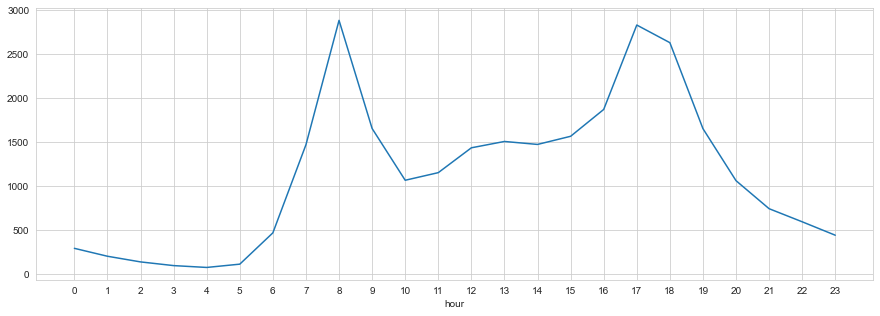

In [68]:
hour_cnt = df.groupby('hour').mean()['cnt']

plt.figure(figsize = (15,5))

plt.xticks(np.arange(24))

sns.lineplot(x = hour_cnt.index , y = hour_cnt.values);

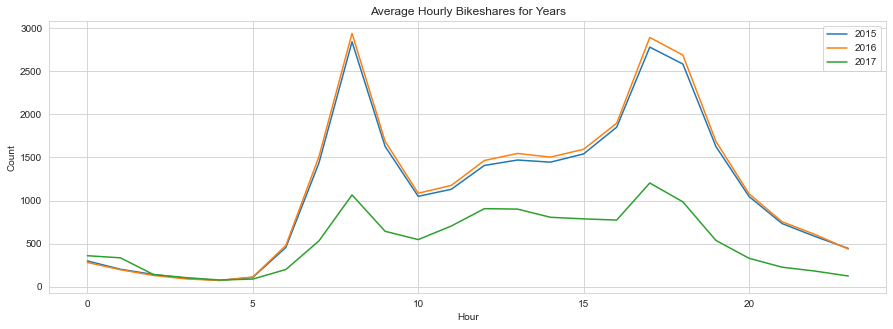

In [69]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))

for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year], label = year)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')

plt.show() # 2017 has only 1 month and its January. So 2017 has too low avearage cnt. But 2015 and 2016 almost same.

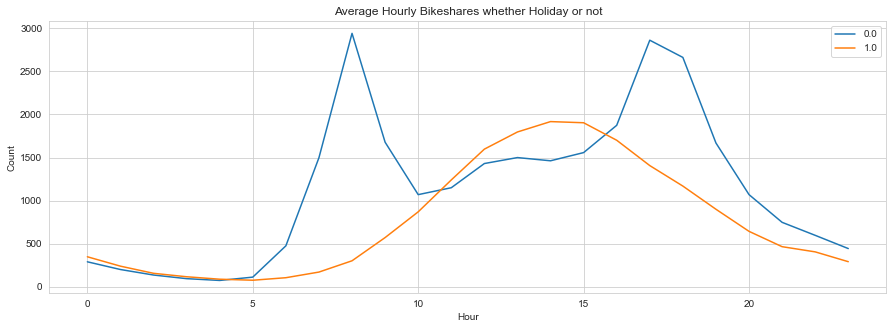

In [70]:
# df.groupby(["hour","is_holiday"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize = (15,5))

for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label = is_holiday)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')

plt.show()

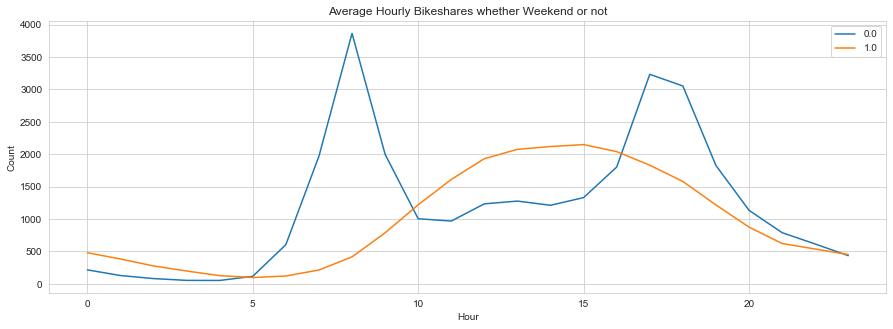

In [71]:
#df.groupby(["hour","is_weekend"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))

for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label = is_weekend)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')

plt.show()

In [72]:
df.groupby(["is_holiday","is_weekend"])["cnt"].count() # That's why last 2 lineplots almost same.

is_holiday  is_weekend
0.000       0.000         12060
            1.000          4970
1.000       0.000           384
Name: cnt, dtype: int64

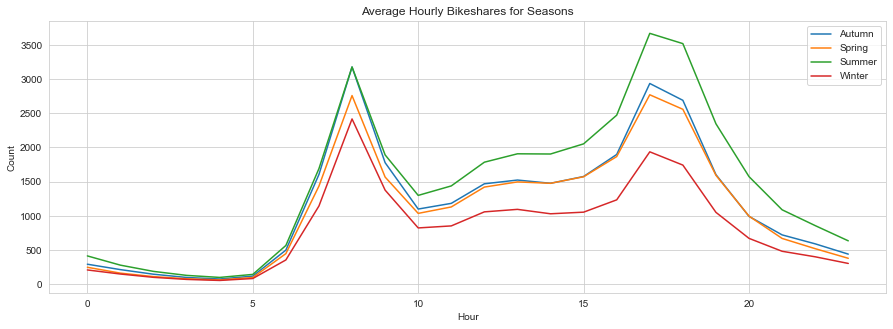

In [73]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize = (15,5))

for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season] , label = season)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')

plt.show() # Pattern same but in Summer more cnt, in winter less.

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

In [75]:
# df.groupby("dayOfWeek")["cnt"].mean()

dayOfWeek
0   1130.271
1   1230.105
2   1244.409
3   1258.811
4   1182.773
5    995.554
6    959.567
Name: cnt, dtype: float64

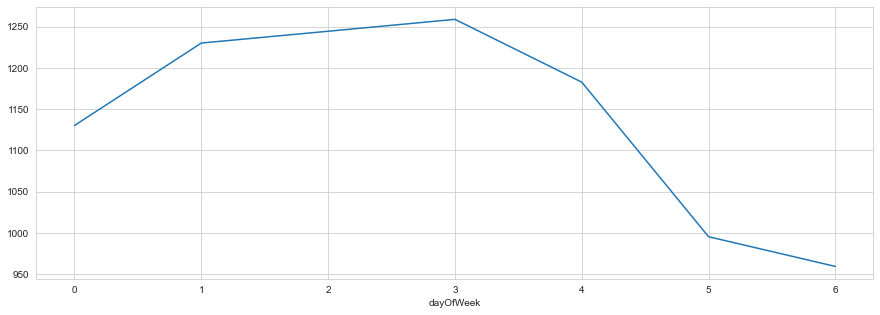

In [78]:
weekday_cnt = df.groupby("dayOfWeek")["cnt"].mean()

plt.figure(figsize = (15,5))

sns.lineplot(x = weekday_cnt.index, y = weekday_cnt.values);

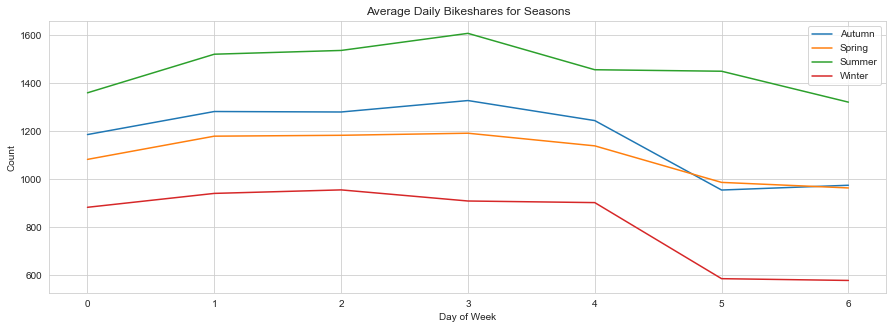

In [81]:
season_dayofweek_cnt = df.groupby(["season_name", "dayOfWeek"])["cnt"].mean()

plt.figure(figsize =( 15,5))

for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season] , label = season)

plt.legend()

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')

plt.show() # Almost same patterns by seasons.

***v. Plot the distribution of bike shares on holidays by seasons***

In [82]:
df_holiday = df[df['is_holiday'] == 1]

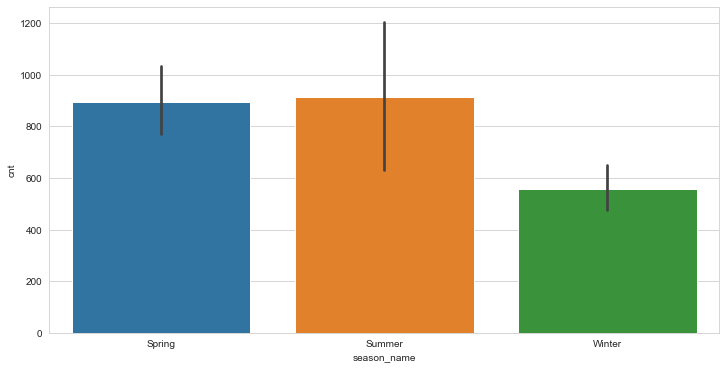

In [90]:
plt.figure(figsize = (12,6))

sns.barplot(x = 'season_name', y = 'cnt', data = df_holiday); # Its not True.

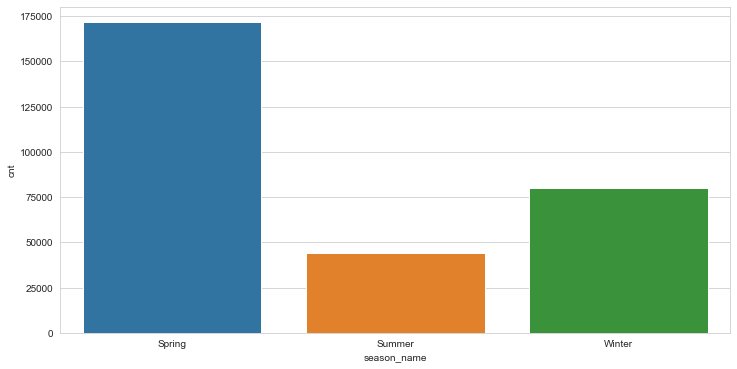

In [91]:
plt.figure(figsize = (12,6))

sns.barplot(x = 'season_name', y = 'cnt', data = df_holiday , ci = None , estimator = sum); # Its more realistic. estimator = sum is important parameter.

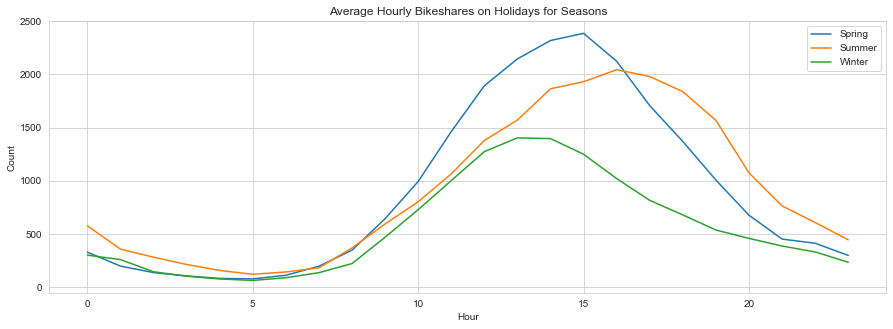

In [92]:
season_holiday_cnt = df_holiday.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize = (15,5))

for season in season_holiday_cnt.index.levels[0]:
    plt.plot(season_holiday_cnt[season].index, season_holiday_cnt[season],label=season)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Holidays for Seasons')

plt.show()

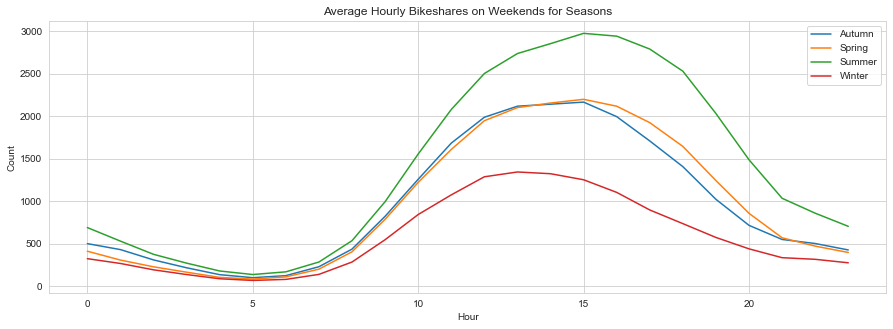

In [93]:
season_weekend_cnt = df[df["is_weekend"] == 1].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))

for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=  season)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')

plt.show()

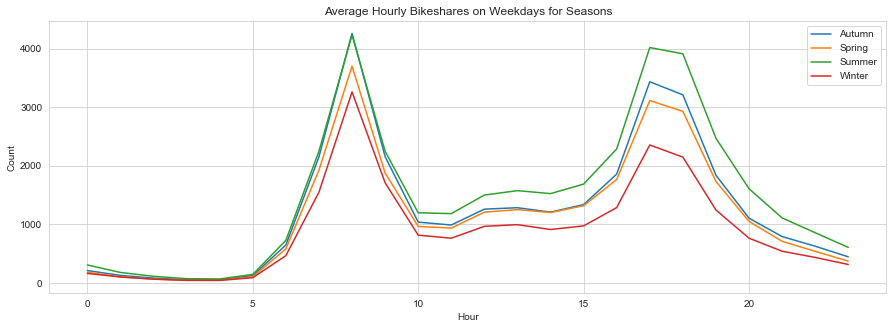

In [95]:
season_weekend_cnt = df[df["is_weekend"]==0].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize = (15,5))

for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekdays for Seasons')

plt.show()

## Data Cleaning

![](2022-11-19-19-38-06.png)

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

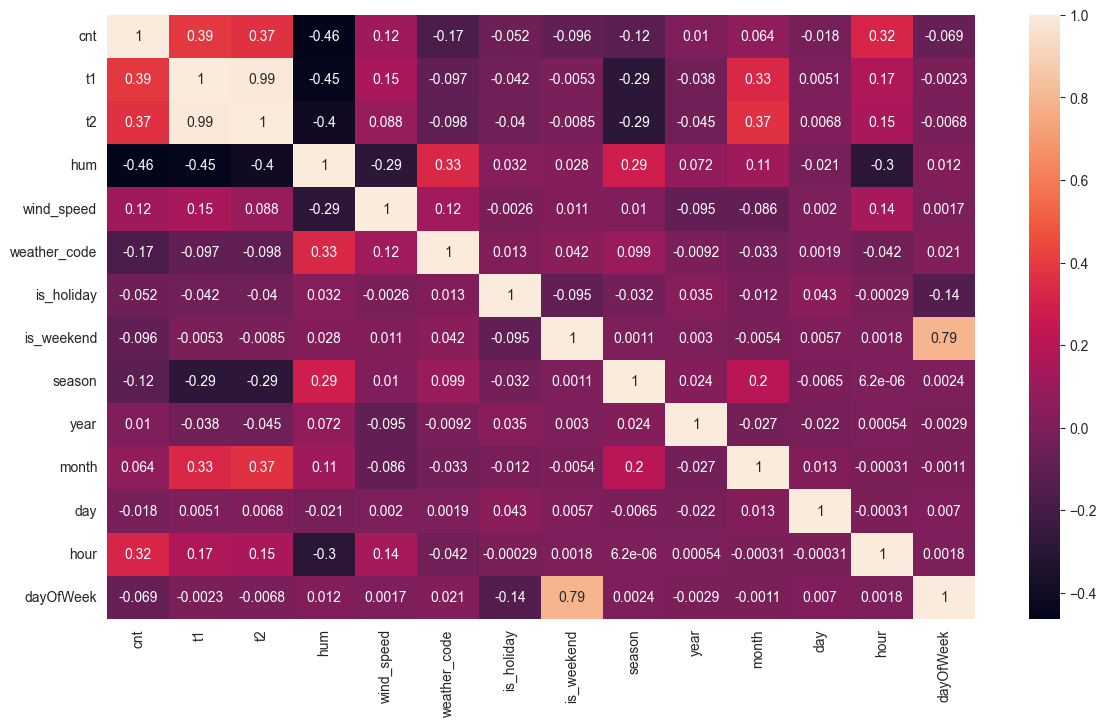

In [99]:
plt.figure(figsize = (14,8) , dpi = 100)

sns.heatmap(df.corr(), annot = True);

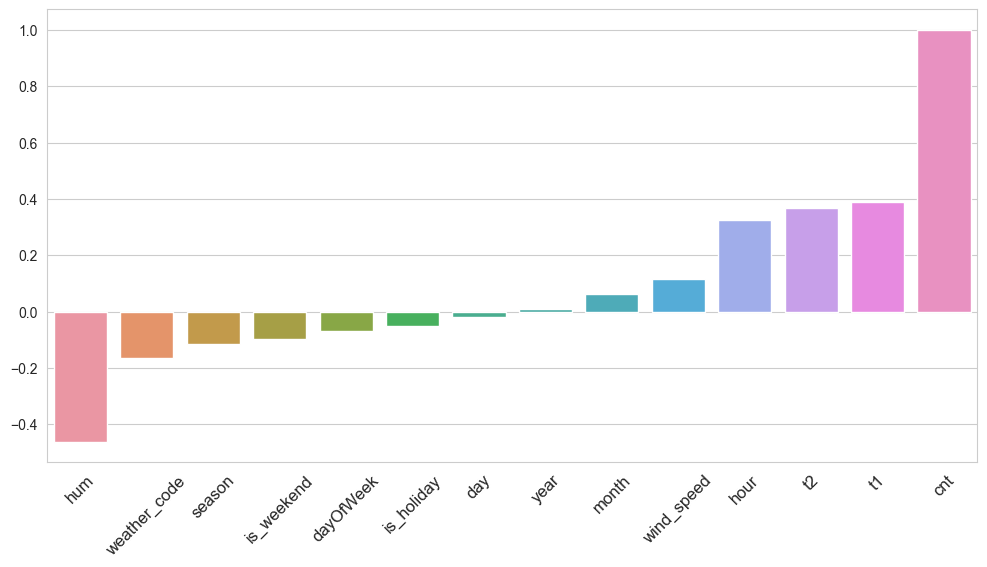

In [129]:
plt.figure(figsize = (12,6) , dpi = 100)

plt.xticks(fontsize = 12 , rotation = 45)

sns.barplot(x = df.corr()['cnt'].sort_values().index , y = df.corr()['cnt'].sort_values().values);

In [100]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayOfWeek,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,0,6,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,1,6,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,2,6,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,3,6,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,4,6,2015-01-04,Winter


weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


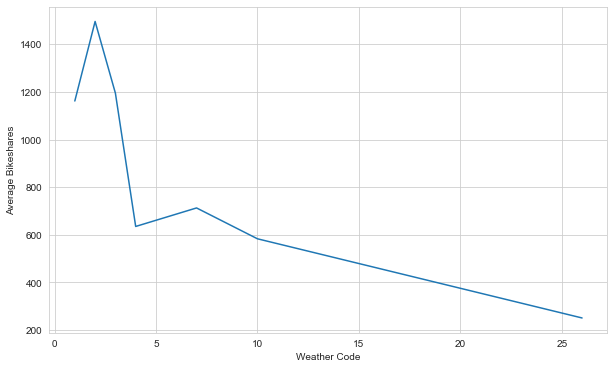

In [130]:
plt.figure(figsize = (10,6))

ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')

print(df.groupby('weather_code')['cnt'].mean())

In [131]:
df_raw = df[['cnt','t1','t2' , 'hum' , 'wind_speed' , 'weather_code' , 'is_holiday' , 'is_weekend', 'season']] # 't2' and 'season could be dropped.
# df_raw = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)

In [134]:
df_raw.drop(['t2','season'] , axis = 1 , inplace = True)

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_11352\2065537900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(['t2','season'] , axis = 1 , inplace = True)


In [135]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [136]:
df_raw.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend
timestamp,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,3.000,0.000,1.000
2015-01-04 01:00:00,138,3.000,93.000,5.000,1.000,0.000,1.000
2015-01-04 02:00:00,134,2.500,96.500,0.000,1.000,0.000,1.000
2015-01-04 03:00:00,72,2.000,100.000,0.000,1.000,0.000,1.000
2015-01-04 04:00:00,47,2.000,93.000,6.500,1.000,0.000,1.000


In [137]:
weather_dummy = pd.get_dummies(df_raw['weather_code'].astype("str"), prefix="w_code", drop_first=True)

df_dum = pd.concat([df_raw, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,0,0,0,0,0,0


In [138]:
df_dum.shape

(17414, 12)

In [140]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[:train_size], df_dum.iloc[train_size:]
print(len(train), len(test))

15672 1742


### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

![](image.png.png)

In [141]:
from sklearn.preprocessing import RobustScaler # from sklearn.preprocessing import MinMaxScaler

In [145]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['cnt'] = target_transformer.transform(test[['cnt']])

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_11352\814984356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
C:\Users\EmincanY\AppData\Local\Temp\ipykernel_11352\814984356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = target_transformer.fit_transform(train[['cnt']])
C:\Users\EmincanY\AppData\Local\Temp\ipykernel_11352\814984356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [147]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [148]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15648, 24, 12) (15648,)
(1718, 24, 12) (1718,)


![](2022-11-19-21-02-11.png)

## 3. Model Building with LSTM

##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.

![](2022-11-19-21-11-47.png)

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [151]:
X_train.shape

(15648, 24, 12)

In [153]:
n_features = X_train.shape[2]

In [154]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape = (time_steps, n_features))))

# model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [156]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True) # restore_best_weights is perfect parameter...

In [157]:
model.fit(X_train, y_train, 
          epochs = 30, 
          batch_size = 32, 
          validation_split = 0.3,
          callbacks = [early_stop])

Epoch 1/30
343/343 [==============================] - 11s 24ms/step - loss: 0.1322 - val_loss: 0.0869
Epoch 2/30
343/343 [==============================] - 7s 20ms/step - loss: 0.0463 - val_loss: 0.0398
Epoch 3/30
343/343 [==============================] - 8s 23ms/step - loss: 0.0285 - val_loss: 0.0253
Epoch 4/30
343/343 [==============================] - 9s 25ms/step - loss: 0.0217 - val_loss: 0.0240
Epoch 5/30
343/343 [==============================] - 9s 26ms/step - loss: 0.0185 - val_loss: 0.0214
Epoch 6/30
343/343 [==============================] - 8s 22ms/step - loss: 0.0165 - val_loss: 0.0200
Epoch 7/30
343/343 [==============================] - 8s 25ms/step - loss: 0.0159 - val_loss: 0.0207
Epoch 8/30
343/343 [==============================] - 9s 26ms/step - loss: 0.0152 - val_loss: 0.0194
Epoch 9/30
343/343 [==============================] - 8s 22ms/step - loss: 0.0138 - val_loss: 0.0187
Epoch 10/30
343/343 [==============================] - 9s 25ms/step - loss: 0.0132 - val_l

In [158]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              144384    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________


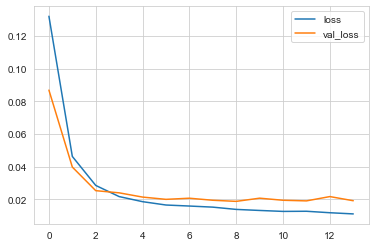

In [160]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [162]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

In [163]:
y_pred = model.predict(X_test)

54/54 [==============================] - 2s 10ms/step


In [164]:
eval_metrics(y_test, y_pred)

r2_score: 0.9717955389711476 
mae: 0.06739867001265983 
mse: 0.01157122295729993 
rmse: 0.10756961911850357


### Inverse Transformation and Compare

In [165]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [166]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns = ['test','prediction']
pred_test.index = test_index

In [167]:
pred_test

,test,prediction
timestamp,,
2016-10-24 08:00:00,3985.000,4297.660
2016-10-24 09:00:00,2070.000,2035.361
2016-10-24 10:00:00,968.000,1039.006
2016-10-24 11:00:00,965.000,850.928
2016-10-24 12:00:00,1180.000,1179.410
...,...,...
2017-01-03 19:00:00,1042.000,1068.709
2017-01-03 20:00:00,541.000,586.080
2017-01-03 21:00:00,337.000,378.185


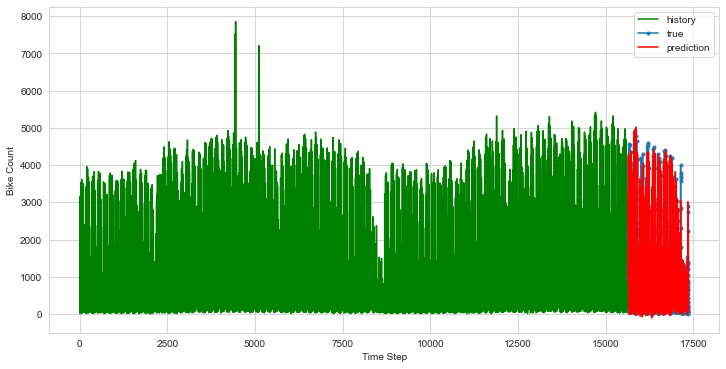

In [170]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")

plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()

plt.show();

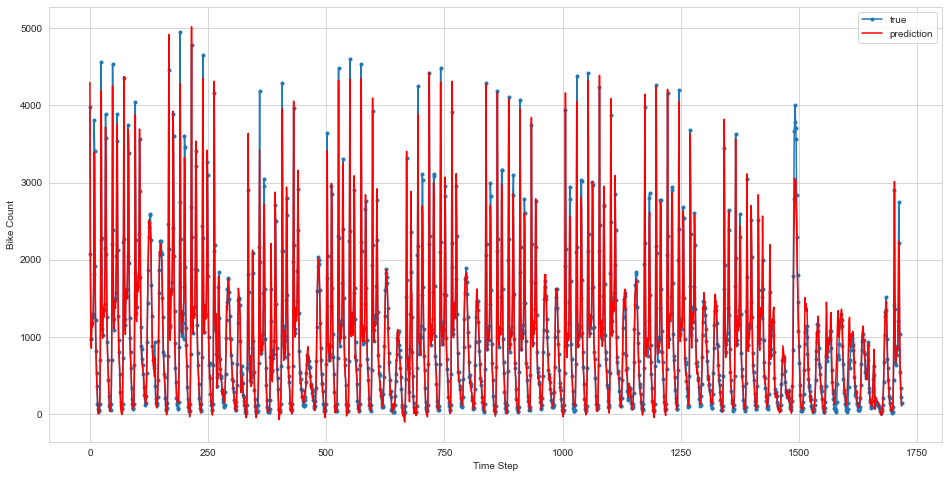

In [174]:
plt.figure(figsize=(16,8))

plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")

plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()

plt.show();

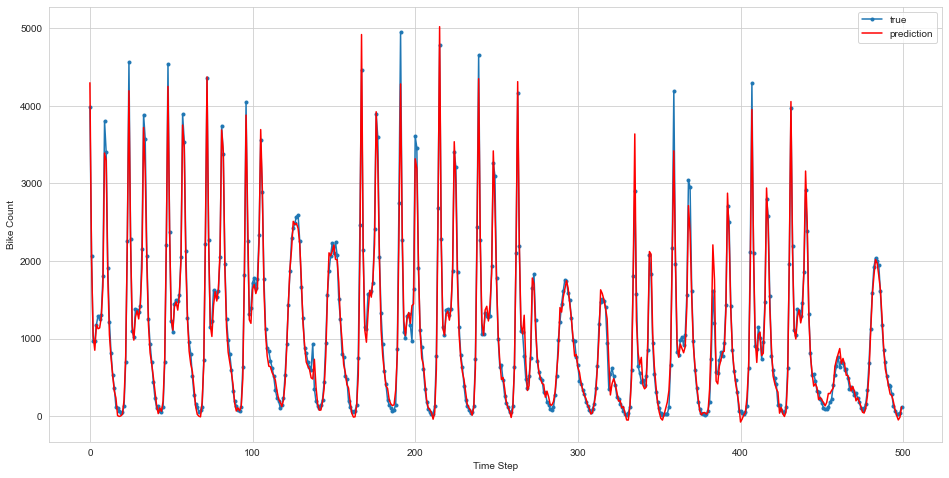

In [176]:
plt.figure(figsize=(16,8))

plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")

plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()

plt.show();

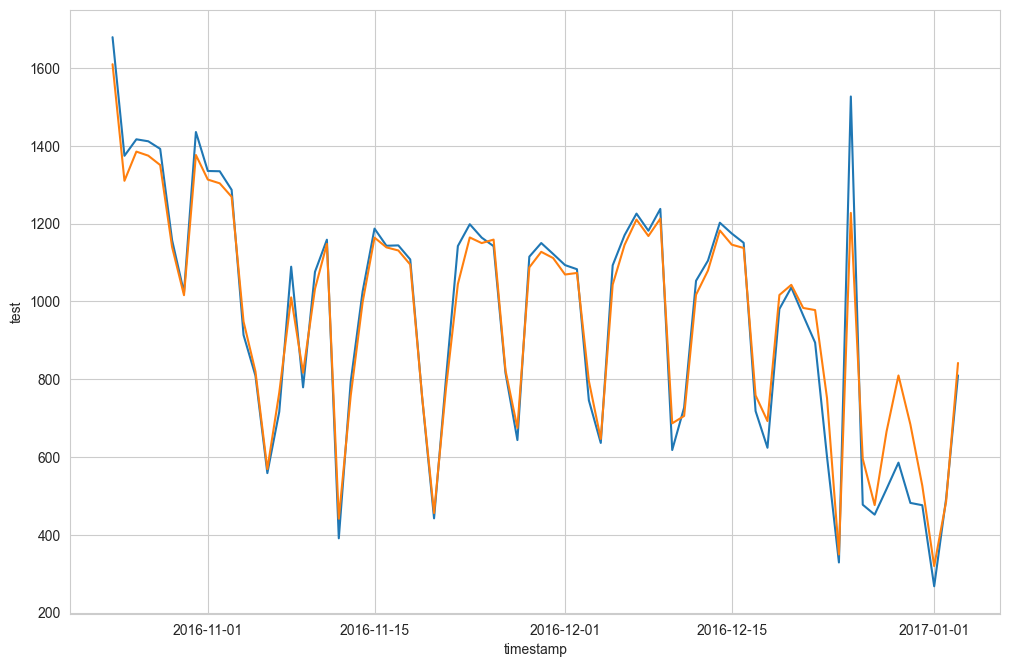

In [181]:
data_by_day = pred_test.resample('24H').mean()

plt.figure(figsize = (12,8) , dpi = 100)

sns.lineplot(x=data_by_day.index, y='test', data=data_by_day)
sns.lineplot(x=data_by_day.index, y='prediction', data=data_by_day)

plt.show()

### Second way : after each prediction, result will be used for next prediction

In [182]:
train

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.465,-1.250,0.975,-0.818,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,-0.495,-1.250,0.975,-0.909,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,-0.498,-1.312,1.150,-1.364,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,-0.541,-1.375,1.325,-1.364,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,-0.558,-1.375,0.975,-0.773,0.000,1.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.441,-0.625,0.825,-0.818,0.000,1.000,0,1,0,0,0,0
2016-10-23 04:00:00,-0.487,-0.625,0.975,-0.818,0.000,1.000,0,1,0,0,0,0
2016-10-23 05:00:00,-0.517,-0.625,0.675,-1.000,0.000,1.000,0,0,0,1,0,0


In [185]:
df_fake = test.iloc[:time_steps,1:] # Get first time_steps(length) without target label.
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,
2016-10-23 08:00:00,-0.625,0.675,-0.818,0.000,1.000,0,1,0,0,0,0
2016-10-23 09:00:00,-0.438,0.275,-0.455,0.000,1.000,0,1,0,0,0,0
2016-10-23 10:00:00,-0.312,0.025,0.000,0.000,1.000,0,0,0,1,0,0
2016-10-23 11:00:00,-0.125,-0.200,0.636,0.000,1.000,0,1,0,0,0,0
2016-10-23 12:00:00,-0.125,-0.325,0.818,0.000,1.000,0,1,0,0,0,0
2016-10-23 13:00:00,-0.062,-0.300,0.818,0.000,1.000,0,1,0,0,0,0
2016-10-23 14:00:00,0.000,-0.525,0.909,0.000,1.000,0,1,0,0,0,0
2016-10-23 15:00:00,0.000,-0.425,0.727,0.000,1.000,0,1,0,0,0,0
2016-10-23 16:00:00,-0.125,-0.325,0.727,0.000,1.000,0,1,0,0,0,0


In [189]:
reel = np.array(test.iloc[:time_steps,:1]) # Get real values
reel.reshape(1,-1)[0]

array([-0.37052342, -0.07782369,  0.34573003,  0.71831956,  0.90151515,
        1.08677686,  0.92699725,  1.06680441,  0.83471074,  0.66735537,
        0.35743802,  0.02548209, -0.16666667, -0.27203857, -0.25895317,
       -0.3815427 , -0.45110193, -0.49655647, -0.54752066, -0.56955923,
       -0.54683196, -0.50344353, -0.18732782,  0.76859504])

In [190]:
df_fake.shape

(24, 11)

In [192]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 11)

In [193]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

1/1 [==============================] - 0s 22ms/step


In [194]:
predictions_scaled

[array([-0.35697693], dtype=float32),
 array([-0.12798752], dtype=float32),
 array([0.2570354], dtype=float32),
 array([0.70515496], dtype=float32),
 array([1.0091815], dtype=float32),
 array([1.1125077], dtype=float32),
 array([1.1004072], dtype=float32),
 array([1.0067152], dtype=float32),
 array([0.8091536], dtype=float32),
 array([0.52973014], dtype=float32),
 array([0.24739112], dtype=float32),
 array([0.01637026], dtype=float32),
 array([-0.15422972], dtype=float32),
 array([-0.253184], dtype=float32),
 array([-0.32475927], dtype=float32),
 array([-0.4052523], dtype=float32),
 array([-0.47150385], dtype=float32),
 array([-0.5089117], dtype=float32),
 array([-0.5670335], dtype=float32),
 array([-0.64194894], dtype=float32),
 array([-0.765719], dtype=float32),
 array([-0.8667609], dtype=float32),
 array([-0.7454916], dtype=float32),
 array([-0.23681247], dtype=float32)]

In [195]:
reel

array([[-0.37052342],
       [-0.07782369],
       [ 0.34573003],
       [ 0.71831956],
       [ 0.90151515],
       [ 1.08677686],
       [ 0.92699725],
       [ 1.06680441],
       [ 0.83471074],
       [ 0.66735537],
       [ 0.35743802],
       [ 0.02548209],
       [-0.16666667],
       [-0.27203857],
       [-0.25895317],
       [-0.3815427 ],
       [-0.45110193],
       [-0.49655647],
       [-0.54752066],
       [-0.56955923],
       [-0.54683196],
       [-0.50344353],
       [-0.18732782],
       [ 0.76859504]])

In [196]:
eval_metrics(reel, predictions_scaled)

r2_score: 0.8061127578025237 
mae: 0.13358540792951207 
mse: 0.06676491109601544 
rmse: 0.2583890692270388


### Inverse Transformation and Compare

In [197]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [198]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-10-23 08:00:00,319.000,338.670
2016-10-23 09:00:00,744.000,671.162
2016-10-23 10:00:00,1359.000,1230.215
2016-10-23 11:00:00,1900.000,1880.885
2016-10-23 12:00:00,2166.000,2322.332
2016-10-23 13:00:00,2435.000,2472.361
2016-10-23 14:00:00,2203.000,2454.791
2016-10-23 15:00:00,2406.000,2318.750
2016-10-23 16:00:00,2069.000,2031.891


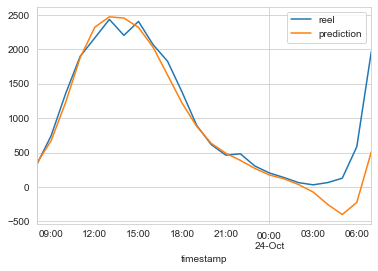

In [199]:
compare.plot();

## 5. Retrain and Forecasting

In [200]:
# Done for now. I'll continue